In [4]:
import librosa
from aubio import source, onset
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
wav_lst = os.listdir('outputs')
sr = 24000

In [11]:
signal ,fs = librosa.load(join('outputs', wav_lst[0]), sr=sr)

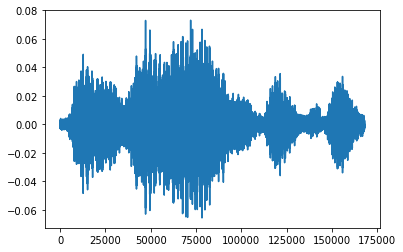

In [12]:
plt.plot(signal)
plt.show()

In [36]:
onset_event_idx = librosa.onset.onset_detect(signal, sr=sr, units='frames')

onset_env = librosa.onset.onset_strength(signal, sr=sr)

In [27]:
onset_event = np.zeros(signal.shape)
onset_event[onset_event_idx] = 1

In [44]:
onset_event_t = librosa.frames_to_time(onset_event_idx)

In [47]:
onset_X = np.arange(len(onset_event))

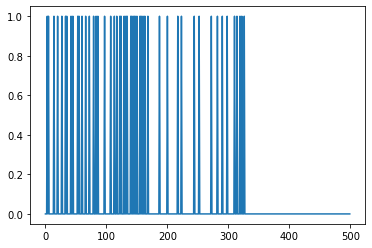

In [51]:
plt.plot(onset_event[:500])

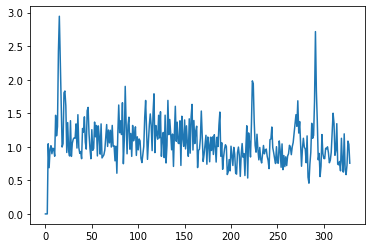

In [37]:
plt.plot(onset_env)

In [40]:
peaks_idx = librosa.util.peak_pick(onset_env, 3, 3, 3, 5, 0.5, 10)

In [41]:
onset_envolope = np.zeros(onset_env.shape)
onset_envolope[peaks_idx] = 1

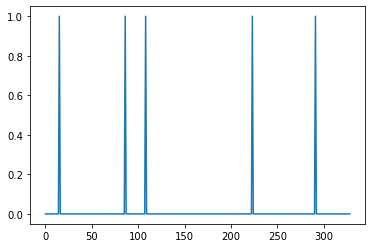

In [42]:
plt.plot(onset_envolope)

## Aubio

In [1]:
def get_onset_times(file_path):
    window_size = 1024 # FFT size
    hop_size = window_size // 4

    sample_rate = 0
    src_func = source(file_path, sample_rate, hop_size)
    sample_rate = src_func.samplerate
    onset_func = onset('default', window_size, hop_size)
    
    duration = float(src_func.duration) / src_func.samplerate

    onset_times = [] # seconds
    while True: # read frames
        samples, num_frames_read = src_func()
        if onset_func(samples):
            onset_time = onset_func.get_last_s()
            if onset_time < duration:
                onset_times.append(onset_time)
            else:
                break
        if num_frames_read < hop_size:
            break
    
    return onset_times

In [7]:
file_path = join('outputs', wav_lst[0])
onset_times = get_onset_times(file_path)

In [8]:
onset_times

[0.0,
 1.334308385848999,
 1.3935147523880005,
 1.4508843421936035,
 1.511950135231018,
 1.5714513063430786,
 1.629569172859192,
 1.7495918273925781,
 1.8089796304702759,
 2.099682569503784]